#**Analysing Data Science Books on Amazon**

#1. Aims, Objectives, and Background

##1.1. Introduction

As a student studying Data Science, I am always hunting for helpful literature in the domain. With the crazy amount of books in the market, it can get quite overwhelming and confusing when choosing a book. It is also very time-consuming to go through all the reviews and finding something that fits my needs.

With this motivation, the scope of my project is to use 3 levels of analysis on a datast of almost 1000 books on data science. I will not be looking into other niches (that might have a different characteristics and audience base). Therefore, in this project I will explore the statistics of Data Science books on Amazon.

##1.2. Aims and Objectives
Within this project, I would like to explore the following:

- EDA (Level 1):
  
  * Do more expensive books have higher ratings?
  * Do longer books tend to be more expensive?
  * Top 5 books in Python Machine Learning, MS Excel
- Fnding the main categories of books: TF-IDF and K-means (Level 2)

  



##1.3. Steps of the project
1. Obtain dataset through Kaggle
2. Prepocess data and engineer additional features for analysis
3. Exploratory data analysis
4. Cluster Analysis
4. Conclusions

##1.4. Dataset
###Data Selection
This project uses a dataset imported from [Kaggle](https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books)

###Data Limitations
This dataset is a real world dataset obtained by scraping Amazon and is suitable for research. However, it contains many null values which have been accordingly handled in this file. Another thing to keep in mind that this is a small sample (only around 1000 entries) and is as of 2022. There are more books on Amazon in this niche which might be 'better'. All analyses made to find the 'best' books is based on the reviews/ratings but there are other metrics that can also be used.

###Ethics of The Source
According to [Kaggle](https://www.kaggle.com), the usage of data is free of cost.

The dataset is published under [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) License (which gives free access to everyone), there is no particular privacy issues as far as I am concerned. In addition, the data is obtained only for research purposes in this case and not for any commercial interests.

In [38]:
# Important libraries for handling the data
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
#NLP
from wordcloud import WordCloud

In [3]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final_book_dataset_kaggle2.csv")
df

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Deep Learning: Engage the World Change the World,"[ Michael Fullan, Joanne Quinn, et al.]",5.33,8.55 - 35.33,208,4.5,74,72%,14%,7%,2%,4%,7 x 0.47 x 10 inches,15.5 ounces,English,"Corwin; First edition (December 15, 2017)",59,/Deep-Learning-Engage-World-Change/dp/15063685...,https://www.amazon.com/Deep-Learning-Engage-Wo...
826,Machine Learning in Finance: From Theory to Pr...,"[ Matthew F. Dixon, Igor Halperin, et al.]",55.18,52.41 - 55.18,573,4.5,93,78%,7%,7%,4%,4%,6.14 x 1.25 x 9.21 inches,2.25 pounds,English,"Springer; 1st ed. 2020 edition (July 2, 2020)",,/Machine-Learning-Finance-Theory-Practice/dp/3...,https://www.amazon.com/Machine-Learning-Financ...
827,Practical Deep Learning at Scale with MLflow: ...,"[ Yong Liu, and , Dr. Matei Zaharia]",44.99,44.99,288,4.8,8,83%,17%,NaN,NaN,NaN,7.5 x 0.65 x 9.25 inches,1.1 pounds,English,"Packt Publishing (July 8, 2022)",978-1803241333,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
828,Clinical Biostatistics and Epidemiology Made R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Clinical-Biostatistics-Epidemiology-Ridiculou...,https://www.amazon.com/Clinical-Biostatistics-...


#2. Data Preprocessing and Feature Engineering

The dtaaset is mostly clean, but there are a lot of null values. Also, many columns are not in the right datatype.

In [4]:
df.dtypes

title                            object
author                           object
price                           float64
price (including used books)     object
pages                            object
avg_reviews                     float64
n_reviews                        object
star5                            object
star4                            object
star3                            object
star2                            object
star1                            object
dimensions                       object
weight                           object
language                         object
publisher                        object
ISBN_13                          object
link                             object
complete_link                    object
dtype: object

In [5]:
df.isnull().sum()

title                             0
author                          173
price                           108
price (including used books)    108
pages                            85
avg_reviews                     128
n_reviews                       128
star5                           128
star4                           195
star3                           276
star2                           379
star1                           502
dimensions                      186
weight                          179
language                         71
publisher                       116
ISBN_13                         165
link                              0
complete_link                     0
dtype: int64

Using imputation, I have handled the null values accordingly (depending on string/int entries, the value in itself, and so on)

In [10]:
# Converting count columns to nummeric values
cols=['pages', 'n_reviews',]
df[cols]=df[cols].apply(pd.to_numeric, errors='coerce')
#impute 'price'
df['price'].fillna('Unknown', inplace=True)
# to impute the values of all NaN values with numeric values
df['n_reviews'].fillna(0, inplace=True)
numeric_cols = ['pages', 'avg_reviews']
# Select only numeric columns
df_numeric = df[numeric_cols]
# Create the SimpleImputer and fit-transform the numeric columns
imputer = SimpleImputer(strategy='mean')
df_imputed_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=numeric_cols)
# Combine the imputed numeric columns with the non-numeric columns from the original DataFrame
df= pd.concat([df.drop(columns=numeric_cols), df_imputed_numeric], axis=1)
# Imputing the columns with string datatype
cols1 = ['title', 'ISBN_13', 'publisher', 'price (including used books)', 'author', 'dimensions', 'weight']
df_copy = df[cols1].fillna('Unknown').copy()
df= pd.concat([df.drop(columns=cols1), df_copy], axis=1)
# Replacing NaN values in `language` with 'English'
df['language'].fillna('English', inplace=True)
# Replacing NaN values in the star columns with 0
stars=['star5','star4','star3','star2','star1']
dfcopy = df[stars].fillna(0).copy()
df= pd.concat([df.drop(columns=stars), dfcopy], axis=1)
df.isnull().any()

price                           False
n_reviews                       False
language                        False
link                            False
complete_link                   False
pages                           False
avg_reviews                     False
title                           False
ISBN_13                         False
publisher                       False
price (including used books)    False
author                          False
dimensions                      False
weight                          False
star5                           False
star4                           False
star3                           False
star2                           False
star1                           False
dtype: bool

The final, cleaned dataset that is ready to use for analysis:

In [11]:
# Changing the order of columns to make it more comprehensive
order=['title', 'author','price', 'pages', 'price (including used books)',
       'avg_reviews','n_reviews','star5','star4','star3','star2',
       'star1','publisher', 'language','dimensions','weight',
       'ISBN_13','link','complete_link']
df=df[order]
df.head()

,title,author,price,pages,price (including used books),avg_reviews,n_reviews,star5,star4,star3,star2,star1,publisher,language,dimensions,weight,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,500.0,6.75,4.4,23.0,55%,39%,6%,0,0,"Notion Press Media Pvt Ltd (November 22, 2021)",English,8.5 x 1.01 x 11 inches,2.53 pounds,978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,Unknown,33.72,484.0,21.49 - 33.72,4.3,124.0,61%,20%,9%,4%,6%,"O'Reilly Media; 1st edition (August 18, 2009)",English,8 x 0.98 x 9.25 inches,1.96 pounds,978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,274.0,32.07,4.7,10.0,87%,13%,0,0,0,"Holy Macro! Books; Third edition (August 1, 2022)",English,8.25 x 0.6 x 10.75 inches,1.4 pounds,978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,547.0,53.99,4.6,0.0,75%,16%,5%,2%,2%,"O'Reilly Media; 2nd edition (November 14, 2017)",English,7 x 1.11 x 9.19 inches,1.47 pounds,978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,368.0,24.49,3.9,12.0,52%,17%,10%,10%,10%,"For Dummies; 5th edition (February 3, 2022)",English,7.38 x 0.83 x 9.25 inches,1.3 pounds,978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


#3 Level 1: Exploratory Data Analysis

##3.1. Price v/s Reviews
As seen from the scatterplot, there is no clear correlation between the price and the average rating. A relatively cheaper book can higher reviews, while a more expensive one has low ratings.

In [15]:
# Create scatter plot
plot1=px.scatter(df, x='price', y='avg_reviews', size='n_reviews',opacity=0.6)
plot1.show()

##3.2. Price v/s Number of Pages
As expected, we can see a linear correlation between the two. In most cases, as the number of pages increases, so does the price (since it costs more to print them, and it also takes more time and effort to longer books).

In [14]:
# Sort df as per the pages column
sorted= df.sort_values('pages')
# Create scatter plot
pgs = px.scatter(sorted, x='price', y='pages')
pgs.show()

##3.3. Top 5___ Books

I've used two parameters, namely `avg_reviews` and `n_reviews` to find the top 5 books on a particular topic. The rationale behind this is that there may be books with fewer reviews, but they are positive as opposed to large number of reviews with more negative reviews. So, doing this will help prevent bias on the basis of the number of reviews. I am interested to find the best Python, Machine Learning and Microsoft Excel books.


As seen, the 'best' book on Python is *'Python Programming for Beginners: Python Programming Creak Course to Get Python Coding Well & Quick'* by Donald P. Wilson with an average rating of 5 (based on 126 ratings).

In [16]:
# Top 5 Python Books
# Selecting books with 'Python' in the title
python= df[df['title'].str.contains("Python")]
# Python books with most reviews and highest avg rating
top_py= python.nlargest(5, ['avg_reviews','n_reviews'])
top_py

,title,author,price,pages,price (including used books),avg_reviews,n_reviews,star5,star4,star3,star2,star1,publisher,language,dimensions,weight,ISBN_13,link,complete_link
34,Python Programming for Beginners: Python Progr...,[ Donald P. Wilson],Unknown,100.0,Unknown,5.0,126.0,97%,3%,0,0,0,Unknown,English,Unknown,Unknown,Unknown,/Python-Programming-Beginners-Course-Coding-eb...,https://www.amazon.com/Python-Programming-Begi...
64,Machine Learning Explained The Simple Way: A B...,[ Santos Ozoemena],11.97,216.0,11.97,5.0,21.0,100%,0,0,0,0,"Independently published (October 31, 2022)",English,6.69 x 0.49 x 9.61 inches,1 pounds,979-8803622086,/Machine-Learning-Explained-Simple-Way/dp/B0BL...,https://www.amazon.com/Machine-Learning-Explai...
584,The Recursive Book of Recursion: Ace the Codin...,[ Al Sweigart],35.99,328.0,35.99,5.0,16.0,100%,0,0,0,0,"No Starch Press (August 16, 2022)",English,7 x 0.75 x 9.25 inches,13 ounces,978-1718502024,/Recursive-Book-Recursion-Interview-Javascript...,https://www.amazon.com/Recursive-Book-Recursio...
711,Data Science Crash Course for Beginners with P...,Unknown,23.48,314.0,19.99 - 23.48,5.0,10.0,100%,0,0,0,0,"AI Publishing LLC (August 31, 2020)",English,6 x 0.71 x 9 inches,14.9 ounces,978-1734790146,/Science-Crash-Course-Beginners-Python/dp/1734...,https://www.amazon.com/Science-Crash-Course-Be...
423,Artificial Intelligence Programming with Pytho...,[ Perry Xiao],28.49,720.0,28.49,5.0,6.0,100%,0,0,0,0,"Wiley; 1st edition (March 11, 2022)",English,7.38 x 1.63 x 9.25 inches,2.55 pounds,978-1119820864,/Artificial-Intelligence-Programming-Python-Ze...,https://www.amazon.com/Artificial-Intelligence...


In the case of books on machine learning, the list is topped by *'Machine Learning Explained The Simple Way: A Beginners Guide to Learning Python for Data Science, Machine Learning and Ace your Data Science Interview With little Coding Experience'* by Santos Ozoemena, with an average rating of 5 (with 21 reviews)

In [17]:
# Top 5 ML Books
# Selecting books with 'Machine Learning' or 'ML' in the title
ml= df[df['title'].str.contains("Machine Learning|ML")]
# ML books with most reviews and highest avg rating
top_ml= ml.nlargest(5, ['avg_reviews','n_reviews'])
top_ml

,title,author,price,pages,price (including used books),avg_reviews,n_reviews,star5,star4,star3,star2,star1,publisher,language,dimensions,weight,ISBN_13,link,complete_link
64,Machine Learning Explained The Simple Way: A B...,[ Santos Ozoemena],11.97,216.0,11.97,5.0,21.0,100%,0,0,0,0,"Independently published (October 31, 2022)",English,6.69 x 0.49 x 9.61 inches,1 pounds,979-8803622086,/Machine-Learning-Explained-Simple-Way/dp/B0BL...,https://www.amazon.com/Machine-Learning-Explai...
711,Data Science Crash Course for Beginners with P...,Unknown,23.48,314.0,19.99 - 23.48,5.0,10.0,100%,0,0,0,0,"AI Publishing LLC (August 31, 2020)",English,6 x 0.71 x 9 inches,14.9 ounces,978-1734790146,/Science-Crash-Course-Beginners-Python/dp/1734...,https://www.amazon.com/Science-Crash-Course-Be...
109,Machine Learning: A First Course for Engineers...,"[ Andreas Lindholm, Niklas Wahlström, et al.]",69.99,350.0,69.99,5.0,4.0,100%,0,0,0,0,Cambridge University Press; New edition (June ...,English,7.5 x 0.75 x 10.5 inches,1.94 pounds,,/Machine-Learning-Course-Engineers-Scientists/...,https://www.amazon.com/Machine-Learning-Course...
530,Applied Machine Learning and AI for Engineers:...,[ Jeff Prosise],62.99,425.0,62.99,5.0,1.0,100%,0,0,0,0,"O'Reilly Media; 1st edition (December 20, 2022)",English,7 x 1 x 9.25 inches,1.49 pounds,,/Applied-Machine-Learning-Engineers-Algorithmi...,https://www.amazon.com/Applied-Machine-Learnin...
19,Quantum Machine Learning and Optimisation in F...,"[ Antoine Jacquier, Oleksiy Kondratyev, et al.]",49.99,442.0,36.00 - 49.99,4.9,14.0,90%,10%,0,0,0,"Packt Publishing (October 31, 2022)",English,7.5 x 1 x 9.25 inches,1.67 pounds,,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...


For Microsoft Excel, the with maximum average reviews and number of reviews is *Excel 2023: The Easiest Way to Master Microsoft Excel in 7 Days. 200 Clear Illustrations and 100+ Exercises in This Step-by-Step Guide Designed for Absolute Newbie. Discover Formula, Charts and More* by Leonard Webb, with the values of the parameters being 5 and 335 respectively.

In [18]:
# Top 5 MS Excel Books
# Selecting books with 'Microsoft Excel'  in the title
excel= df[df['title'].str.contains("Microsoft Excel")]
# Excel books with most reviews and highest avg rating
top_excel= excel.nlargest(5, ['avg_reviews','n_reviews'])
top_excel

,title,author,price,pages,price (including used books),avg_reviews,n_reviews,star5,star4,star3,star2,star1,publisher,language,dimensions,weight,ISBN_13,link,complete_link
252,Excel 2023: The Easiest Way to Master Microsof...,[ Leonard Webb],14.99,159.0,14.99,5.0,335.0,99%,1%,0,0,0,"Independently published (October 28, 2022)",English,8 x 0.36 x 10 inches,14.9 ounces,979-8360854005,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
240,Excel 2023: The Most Updated Bible to Master M...,[ Andrew J. Nash],16.99,201.0,16.99,4.9,418.0,94%,4%,1%,1%,0,"Independently published (October 18, 2022)",English,8.5 x 0.46 x 11 inches,1.28 pounds,979-8358890916,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
274,Excel 2023: How to Become a Master of Microsof...,[ Ken Shepard],17.9,201.0,17.9,4.9,180.0,92%,6%,2%,0,0,"Independently published (October 12, 2022)",English,6 x 0.46 x 9 inches,10.5 ounces,979-8357759511,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
140,Excel 2022: Learn From Scratch with the Most U...,[ Robert Johnson],19.24,161.0,19.24,4.8,293.0,93%,3%,1%,3%,0,"Independently published (October 6, 2022)",English,8.5 x 0.37 x 11 inches,1.08 pounds,979-8356241734,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
365,Microsoft Excel Data Analysis and Business Mod...,[ Wayne Winston],34.87,1168.0,34.87,4.7,62.0,77%,16%,3%,4%,0,"Microsoft Press; 7th edition (December 16, 2021)",English,7.4 x 2.3 x 9.1 inches,4.12 pounds,978-0137613663,/Microsoft-Analysis-Business-Modeling-Office/d...,https://www.amazon.com/Microsoft-Analysis-Busi...


#4. Level 2: Cluster Analysis

First, I have used TF-IDF (term frequency-inverse document frequency) to convert the textual data into numerical feature vectors.  

In [19]:
# text vectorization (tf-idf)
vectorizer= TfidfVectorizer(stop_words='english', ngram_range=(1,2))
X=vectorizer.fit_transform(df['title'])

In [20]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,001,01,01 2017,10,10 20gal,10 coding,10 data,10 essential,10 guide,10 minutes,...,zed shaw,zero,zero hero,zero just,zero pro,zipline,zipline python,zoo,zoo med,zoo reptile
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using KMeans clustering, I have roughly grouped the data based on titles. The goal of this analysis is to find out the major 'categories' or sub-topics of Data Science books available in this dataset.

In [21]:
# Kmeans clustering
sum_of_sq_dist=[]
K= range(2,10)
for k in K:
  km=KMeans(n_clusters=k, max_iter=600, n_init=10)
  km.fit(X)
  sum_of_sq_dist.append(km.inertia_)

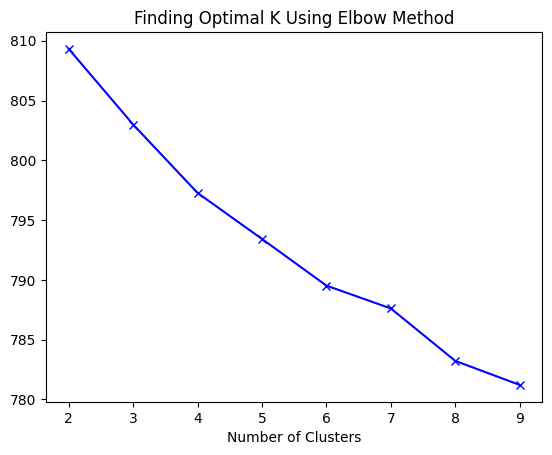

In [22]:
# plotting the sum of squared distances
plt.plot(K, sum_of_sq_dist, 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel=("Sum of Squared Distances")
plt.title("Finding Optimal K Using Elbow Method")
plt.show()

In [23]:
# Using K=6
true_k=6
model=KMeans(n_clusters=true_k, max_iter=600, n_init=10)
model.fit(X)

# Getting prediction/ labels
labels=model.labels_
book_cl=pd.DataFrame(list(zip(df['title'], labels)), columns=['title','cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
111  Exploratory Data Analysis with MATLAB (Chapman...        0
777  Spatial Data Science: With Applications in R (...        0
75   Time Series: A Data Analysis Approach Using R ...        0
757  Data Science for Infectious Disease Data Analy...        0
83   Supervised Machine Learning for Text Analysis ...        0
..                                                 ...      ...
450  Beginner's Guide to Streamlit with Python: Bui...        5
636  Learning OpenCV 4 Computer Vision with Python ...        5
635  Mastering Reinforcement Learning with Python: ...        5
764  Python Machine Learning for Beginners: Learnin...        5
829  AI and Machine Learning for Coders: A Programm...        5

[830 rows x 2 columns]


I have used two methods for visualising these clusters. For a more intuitive understanding I have created wordclouds for each one. I have also plotted a scatter plot, which is the more traditional way in which cluster analysis is done.

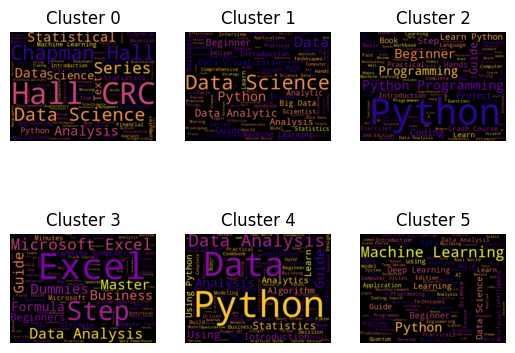

In [25]:
# Creating a wordcloud for the clusters to make it more fancy (and easy to understand)
for k in range(true_k):
  text= book_cl[book_cl.cluster==k]['title'].str.cat(sep=' ')
  wordcloud=WordCloud(width=400,height=300, max_font_size=100, max_words=100, colormap='plasma').generate(text)
  # Creating sublots to put them all together
  plt.subplot(2,3,k+1).set_title("Cluster "+ str(k))
  plt.plot()
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
plt.show()

In [26]:
# Making a more 'traditional' scatter plot for this clustering

# Using truncatedSVD (since the matrix is sparse)
svd= TruncatedSVD(n_components=2)
result= svd.fit_transform(X)
book_cl['SVD1']=result[:, 0]
book_cl['SVD2']=result[:, 1]

In [37]:
# Plotting it
plot = px.scatter(book_cl, x='SVD1', y='SVD2', color='cluster',
                 title='Scatter Plot of Clusters (K=4) using TruncatedSVD',
                 color_continuous_scale='plasma')
plot.update_layout(plot_bgcolor='darkgray')
plot.show()

#5. Conclusions and Future Research Ideas
In this project, I have explored Data Science books available on Amazon and revealed many interesting findings:

* There is no clear correlation between the price and the average rating. A more expensive book doesn't necessarily imply a high rating.

* There is a linear correlation between the price and the length of the book.

* The most popular book on Python is 'Python Programming for Beginners: Python Programming Creak Course to Get Python Coding Well & Quick' by Donald P. Wilson

* The most popular book on Machine Learning is 'Machine Learning Explained The Simple Way: A Beginners Guide to Learning Python for Data Science, Machine Learning and Ace your Data Science Interview With little Coding Experience' by Santos Ozoemena

* The most popular book on MS Excel is 'Excel 2023: The Easiest Way to Master Microsoft Excel in 7 Days. 200 Clear Illustrations and 100+ Exercises in This Step-by-Step Guide Designed for Absolute Newbie. Discover Formula, Charts and More' by Leonard Webb

* The main sub-topics covered by these books are:
  * Statiscal Analysis
  * Beginner Data Science and Big Data
  * Python Programming
  * Microsoft Excel
  * Data Analysis using Python
  * Machine Learning

**Project Limitations**:

The findings should also be taken with a grain of salt. There are many other factors that haven't been taken into the analysis, including the timeframe of data collection and many random effects that would affect how 'good' a book is.

**Ideas for Future Research**:

* Expand the dataset to the sub-topics in this niche

* Do sentiment analysis on the reviews

* Conduct this research for other niches (e.g. Computer Science, Business), to compare different niches with each other to see the different patterns in educational books



##References:

[1] Kaggle Avaiable at https://www.kaggle.com

[3] ThuVu's [video](https://youtu.be/N0o-Bjiwt0M?si=eemHmhL9PUkjhW6E) on how KMeans clustering works